In [2]:
Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц:

m = np.array([[2, 2],
              [1, 3]])
print(m)

SyntaxError: invalid syntax (<ipython-input-2-001dc578d8ec>, line 1)

In [1]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [30]:
#a) Диагональная, ортогональная, но не единичная(!)
m = np.diag([6,8,9])
print(m)

[[6 0 0]
 [0 8 0]
 [0 0 9]]


In [31]:
m = np.diag([2, 2, 1, 3])
print(m)

[[2 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 0 0 3]]


In [32]:
#Верхнетреугольная, ортогональная

In [33]:

m = np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
print(m)

[[ 1  2  3]
 [ 4  5  6]
 [ 0  8  9]
 [ 0  0 12]]


In [34]:
m = np.triu([[2, 2],[1, 3]])
print(m)

[[2 2]
 [0 3]]


In [35]:
#Нижнетреугольная, ортогональная
m = np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
print(m)

[[ 0  0  0]
 [ 4  0  0]
 [ 7  8  0]
 [10 11 12]]


In [36]:
m = np.triu([[2, 2],[1, 3]],-1)
print(m)

[[2 2]
 [1 3]]


In [37]:
#Матрица, у которой определитель = 1, и все элементы не равны 0
m = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 4]], dtype=np.float32)
det = np.linalg.det(m)
print(m)
print(det)

[[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 4.]]
1.0



Найдите спектральное разложение матрицы:

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

In [38]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [39]:
a, U = linalg.eigh(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]


In [40]:
a

array([-0.23606798,  4.23606798])

In [41]:
D = np.diag(a)
D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [42]:
S = U.T


In [43]:
S

array([[-0.85065081,  0.52573111],
       [ 0.52573111,  0.85065081]])

In [44]:
S.T

array([[-0.85065081,  0.52573111],
       [ 0.52573111,  0.85065081]])

In [45]:
np.dot(S.T, S)

array([[ 1.0000000e+00, -1.2127222e-17],
       [-1.2127222e-17,  1.0000000e+00]])

In [18]:
np.dot(np.dot(S.T, D), S)

array([[1., 2.],
       [2., 3.]])

In [2]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

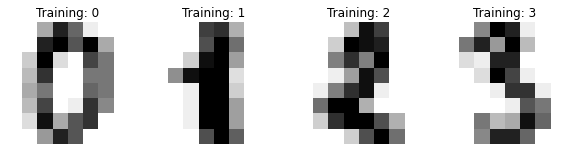

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [9]:
# сгладить изображения
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Создать классификатор: классификатор опорных векторов
clf = svm.SVC(gamma=0.001)

# Разделите данные на 50% обучающих и 50% тестовых подмножеств
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Обучаем 
clf.fit(X_train, y_train)

# Предсказать значение цифры в тестовом подмножестве
predicted = clf.predict(X_test)

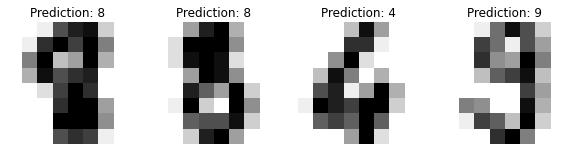

In [24]:
# визуализируем первые 4 тестовых образца и показываем их прогнозируемое цифровое значение в заголовке
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [11]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


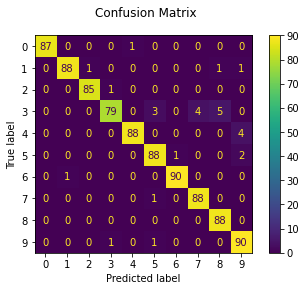

In [19]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()